<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch6_multi_qbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

from google.colab import drive
import os

#Google Drive mounting to Google Colab
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/QML/Kaggle"
#Change the working directory
%cd /content/gdrive/My Drive/QML/Kaggle/

#Check if the directory was properly changed
%pwd

### Quantum circuit with CNOT gate and two qubits

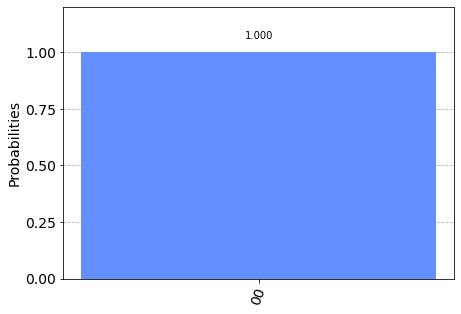

In [ ]:
from math import sqrt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Quantum circuit with two qubits
qc=QuantumCircuit(2)

# Initialize two qubits
qc.initialize([1,0],0)
qc.initialize([1,0],1)

#Apply CNOT gate
qc.cx(0,1)

#Instruct Qiskit to simulate the circuit 
backend = Aer.get_backend('statevector_simulator')

#Execute the qc
results = execute(qc,backend).result().get_counts()

#Plot the results
plot_histogram(results)

### Quantum circuit with Hadamard gate and CNOT gate

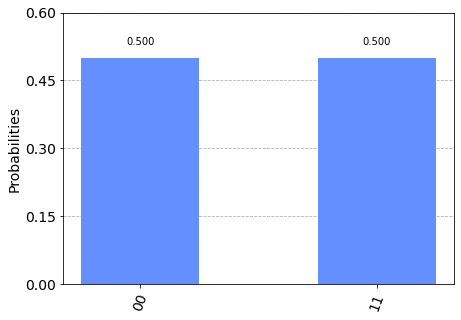

In [ ]:
from math import sqrt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Quantum circuit with two qubits
qc=QuantumCircuit(2)

# Initialize two qubits
qc.initialize([1,0],0)
qc.initialize([1,0],1)

#Apply Hadamard gate
qc.h(0)

#Apply CNOT gate
qc.cx(0,1)

#Instruct Qiskit to simulate the circuit 
backend = Aer.get_backend('statevector_simulator')

#Execute the qc
results = execute(qc,backend).result().get_counts()

#Plot the results
plot_histogram(results)

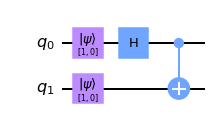

In [ ]:
qc.draw('mpl')

### Circuit with two quantum registers and two qubits, as well as classical register

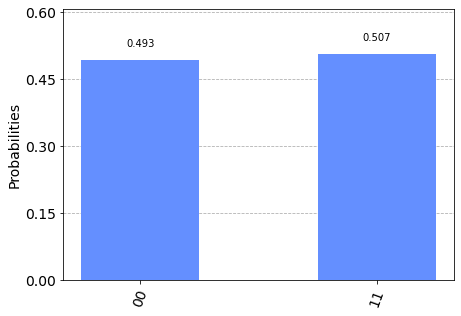

In [9]:
from math import sqrt
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram

# Register of two qubits
qr=QuantumRegister(2)

# Register of two classical bits
cr=ClassicalRegister(2)

# Quantum circuit with two qubits
qc=QuantumCircuit(qr,cr)

# Initialize two qubits
qc.initialize([1,0],0)
qc.initialize([1,0],1)

#Apply Hadamard gate
qc.h(0)

#Apply CNOT gate
qc.cx(0,1)

#Measure the qubits
qc.measure(qr[1], cr[1])
qc.measure(qr[0], cr[0])

#Instruct Qiskit to simulate the circuit 
backend = Aer.get_backend('qasm_simulator')

#Execute the qc
results = execute(qc,backend, shots=1000).result().get_counts(qc)

#Plot the results
plot_histogram(results)

#qasm_simulator is used to iterate 1000 times of executions because qubits are measure whose probabilities are 100% by the time it reaches the results
#The classical bits take the measurement results of the qubits


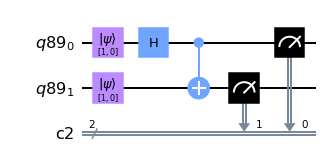

In [ ]:
qc.draw('mpl')

Two Qubit Transformation

In [8]:
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with one qubit
qc=QuantumCircuit(2)

# Apply Hadamard gate to the second and i to the first 
qc.i(0)
qc.h(1)

backend=Aer.get_backend('unitary_simulator') #unitary simulator returns the final transformation matrix of the circuit
unitary=execute(qc, backend).result().get_unitary()

unitary



array([[ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.70710678+0.00000000e+00j,
         0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
        -0.70710678+8.65956056e-17j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.70710678+0.00000000e+00j,
         0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j]])

## Probability in Quantum Circuit

### Marginal Probability

In [7]:
#Define circuit generator

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def run_circuit(qc, simulator='statevector_simulator', shots=1, hist=True):
  
  #Instruction to simulate
  backend=Aer.get_backend(simulator)

  #Execute the QC
  results=execute(qc, backend, shots=shots).result().get_counts()

  return plot_histogram(results, figsize=(18,4)) if hist else result


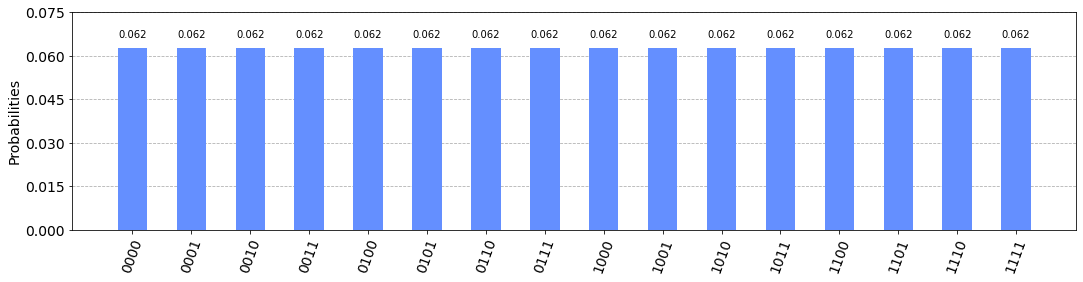

In [ ]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
run_circuit(qc)

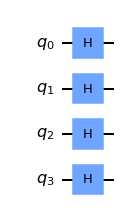

In [ ]:
qc.draw('mpl')

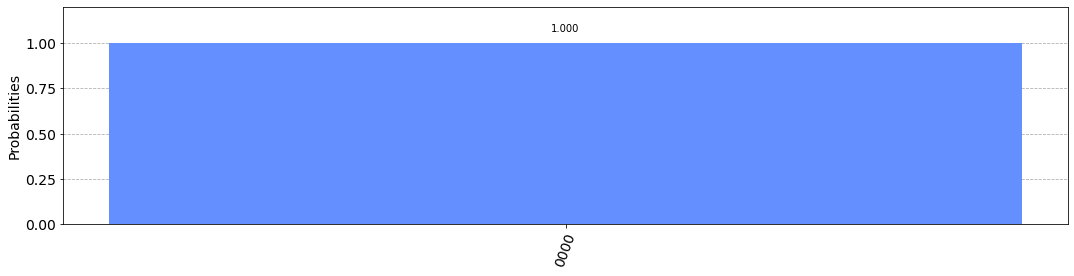

In [ ]:
# Specify the marginal prob

event_a=0.4

qc=QuantumCircuit(4)

run_circuit(qc)

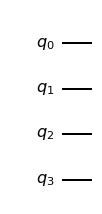

In [ ]:
qc.draw('mpl')

In [6]:
# A tool to control the size of the two parts

from math import asin, sqrt

def prob_to_angle(prob):
  """ Convert a given probability P(psi) value into an equivalent theta value"""
  return 2*asin(sqrt(prob))

### Marginal Probability

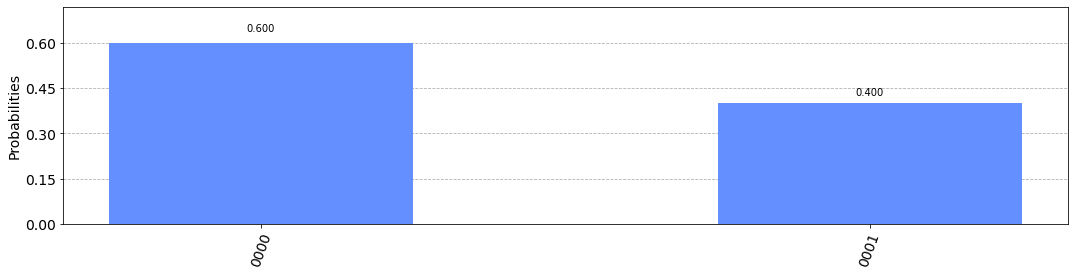

In [ ]:
# Specify the marginal prob

event_a=0.4

qc=QuantumCircuit(4)

qc.ry(prob_to_angle(event_a),0)

run_circuit(qc)

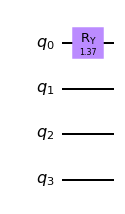

In [ ]:
qc.draw('mpl')

### Joint Probability

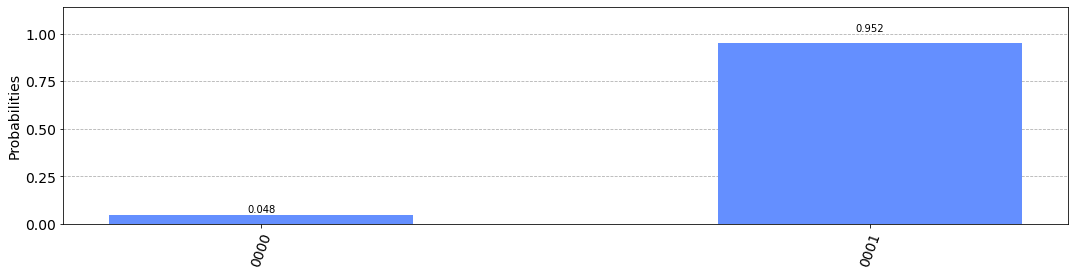

In [ ]:
event_a=0.4
event_b=0.8

qc=QuantumCircuit(4)

#Set the firts qubit to prior
qc.ry(prob_to_angle(event_a),0)

#Apply modifier to the firts qubit
qc.ry(prob_to_angle(event_b),0)

run_circuit(qc)


### Applying angle change to two qubits

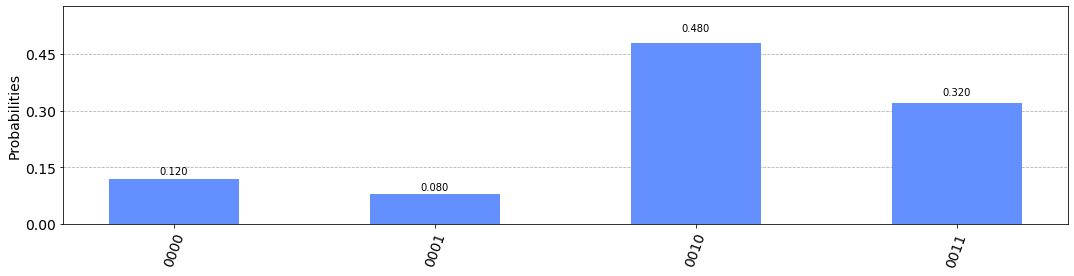

In [ ]:
event_a=0.4
event_b=0.8

qc=QuantumCircuit(4)

#Set the firts qubit to priorto take 1 by 0.4 prob
qc.ry(prob_to_angle(event_a),0)

#Apply modifier to the second qubit to take 1 by 0.8 prob
qc.ry(prob_to_angle(event_b),1)

run_circuit(qc)


The first qubit was modified to make 1 at prob 0.4, hence 000"1"+001"1" sums to prob 0.4

The second qubit was modified to make 1 at prob 0.8, hence 00"1"0+00"1"1 sums to prob 0.8

To get joint prob (0.8*0.40), where first and secon qubits are both 1, entanglement has to be applied


### Apply  entanglement

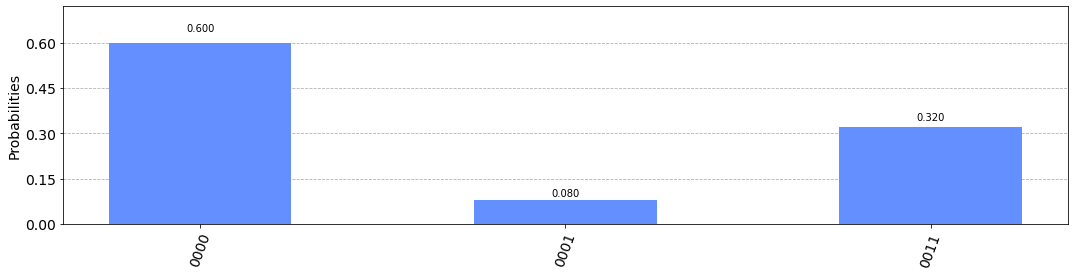

In [ ]:
event_a=0.4
event_b=0.8

qc=QuantumCircuit(4)

#Set the firts qubit to priorto take 1 by 0.4 prob
qc.ry(prob_to_angle(event_a),0)

#Apply modifier to the second qubit = split of probability
qc.ry(prob_to_angle(event_b)/2,1)

# entangle qubits 0 and 1, apply CNOT gate to flip probs of those with 1 in the first qbit
qc.cx(0,1)

#Reverse modifier to the Second qubit = undo the split of probability
qc.ry(-prob_to_angle(event_b)/2,1)

# un-entangle qubits 0 and 1, apply CNOT gate to flip probs of those with 1 in the first qbit
qc.cx(0,1)

run_circuit(qc)


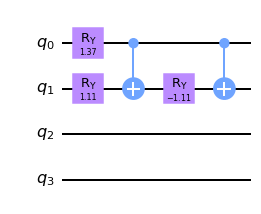

In [ ]:
qc.draw('mpl')

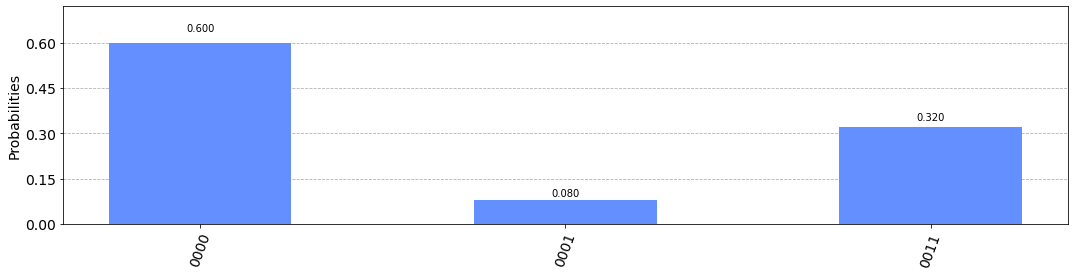

In [ ]:
# Same effect with controlled Ry gate

event_a=0.4
event_b=0.8

qc=QuantumCircuit(4)

#Set the firts qubit to priorto take 1 by 0.4 prob
qc.ry(prob_to_angle(event_a),0)

#Apply cRy gate to the first and second qubits
qc.cry(prob_to_angle(event_b),0,1)

run_circuit(qc)


#Control Ry Gate works only on the control qubit =1 so good for targeted qubits, while CNOT + Ry Gate splits all probs so more versatile.


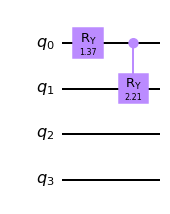

In [ ]:
qc.draw('mpl')

### Conditional Probability

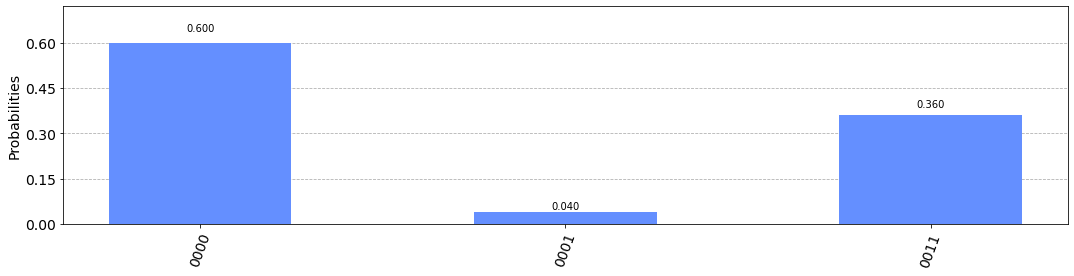

In [ ]:
prior=0.4
modifier=0.9

qc=QuantumCircuit(4)

#Set the firts qubit to prior to take 1 by 0.4 prob
qc.ry(prob_to_angle(prior),0)

#Apply cRy gate to the  second qubits to take 1 at 0.9 prob when qubit 1 is 1
qc.cry(prob_to_angle(modifier),0,1)

run_circuit(qc)

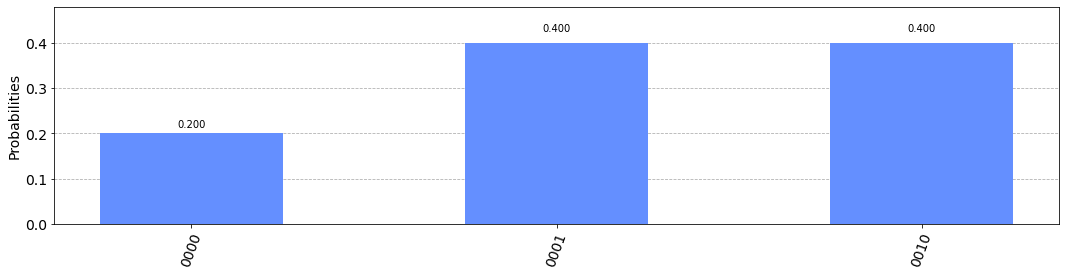

In [ ]:
# When modifier is greater than 1.0

prior=0.4
modifier=1.2

qc=QuantumCircuit(4)

#Set the firts qubit to prior to take 1 by 0.4 prob
qc.ry(prob_to_angle(prior),0)

#Apply cRy gate to the second qubits to take 1 at 1.2 prob when qubit 1 is 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)),0,1)
qc.x(0)

run_circuit(qc)

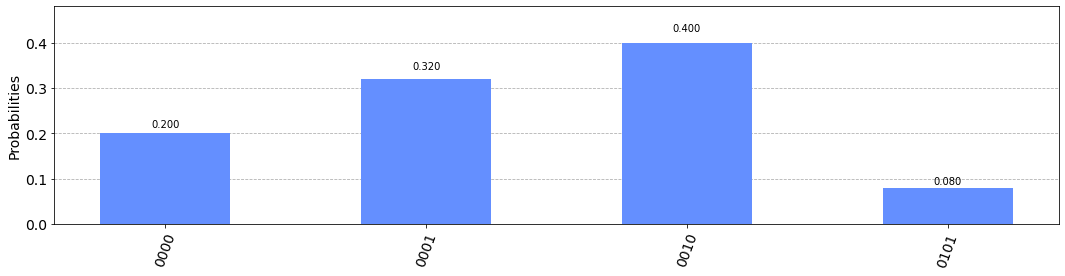

In [ ]:
# When modifier is greater than 1.0

prior=0.4
modifier=1.2

qc=QuantumCircuit(4)

#Set the firts qubit to prior to take 1 by 0.4 prob
qc.ry(prob_to_angle(prior),0)

#Apply cRy gate to the second qubits to take 1 at 1.2 prob when qubit 1 is 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)),0,1)
qc.x(0)

# Apply the modifier to q2 when qubit 1 is 1 (Incrementing modifier-1 as excess from 1 )
qc.cry(prob_to_angle(modifier-1),0,2)

run_circuit(qc)

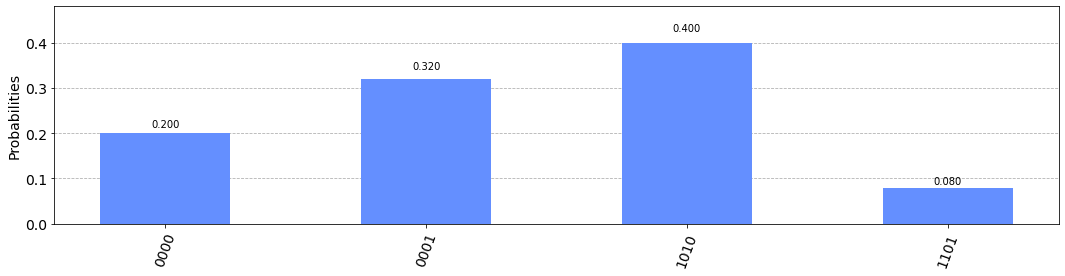

In [ ]:
# When modifier is greater than 1.0

prior=0.4
modifier=1.2

qc=QuantumCircuit(4)

#Set the firts qubit to prior to take 1 by 0.4 prob
qc.ry(prob_to_angle(prior),0)

#Apply cRy gate to the second qubits to take 1 at 1.2 prob when qubit 1 is 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)),0,1)
qc.x(0)

# Apply the modifier to q2 when qubit 1 is 1
qc.cry(prob_to_angle(modifier-1),0,2)

qc.cx(1,3)
qc.cx(2,3)

run_circuit(qc)

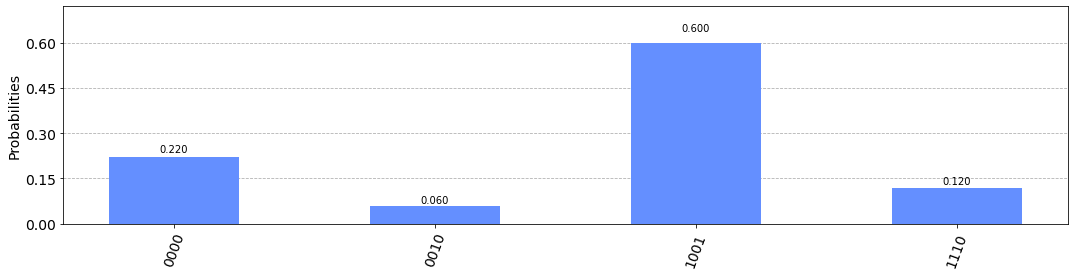

In [ ]:
# When modifier is greater than 1.0

prior=0.6
modifier=1.2

qc=QuantumCircuit(4)

#Set the firts qubit to prior to take 1 by 0.4 prob
qc.ry(prob_to_angle(prior),0)

#Apply cRy gate to the first and second qubits to take 1 at 1.2 * 0.3 prob when qubit 1 is 1, to avoid overflow
qc.x(0)
qc.cry(prob_to_angle(0.3*prior/(1-prior)),0,1)

# Apply the modifier to q2 when qubit 1 is 1 divided by 0.3
qc.cry(prob_to_angle((modifier-1)/0.3),1,2)

qc.x(0)
qc.cx(0,3)
qc.cx(2,3)

run_circuit(qc)

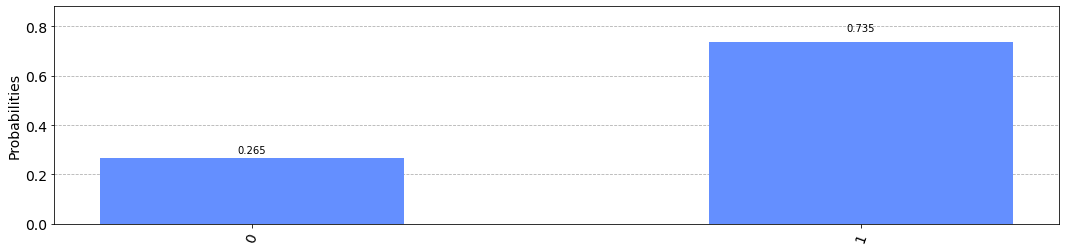

In [ ]:
# The fraction we choose must be smaller than the remaining
# probability (1− prior). If it weren’t, we would exceed the overall probability
# of 1.0 again. But it must be greater than the effect the modifier has, too. If it is
# too small, we can’t separate a part of it that accounts for the modifier’s effect
# on the prior.

from math import ceil
from qiskit import ClassicalRegister, QuantumRegister

# When modifier is greater than 1.0

prior=0.6
modifier=1.2

qr=QuantumRegister(12)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr, cr)

#Set the firts qubit to prior to take 1 by 0.6 prob
qc.ry(prob_to_angle(prior),0)

# Separate parts of the prior
# Register various cases from 0.1 to 1.0, which will be divided later when modifier is applied
qc.x(0)
for i in range(1,10):
  qc.cry(prob_to_angle(min(1, (i * 0.1) *prior/(1-prior))),0,i)

# Choose qubit depending on value of modifier, if mod=1.2, pos=2
pos=ceil((modifier-1)*10)

# Apply the modifier to qubit 11 when qubit-pos(2, if mod=1.2) is 1
qc.cry(prob_to_angle((modifier-1)/(pos*0.1)),pos,11)

qc.x(0)
qc.cx(0,11)

#measure qubit
qc.measure(qr[11], cr[0])

run_circuit(qc, simulator='qasm_simulator', shots=1000 )

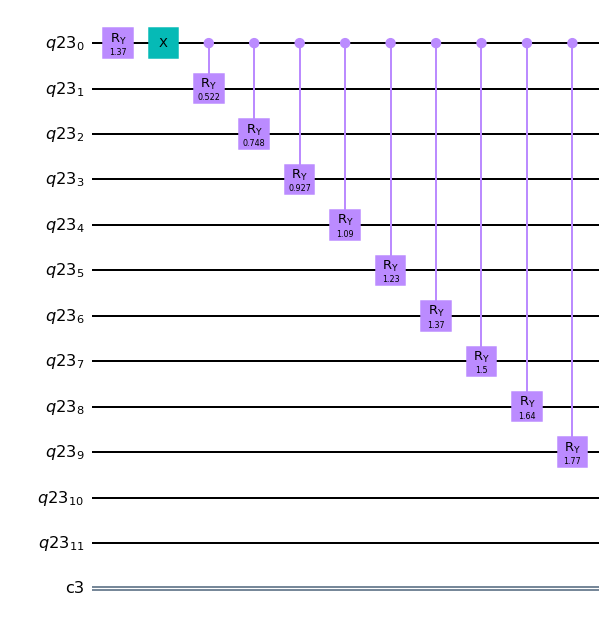

In [12]:
qc.draw('mpl')